[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meguia/DNL_unq/blob/main/DNL_mapas.ipynb)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from putils import *

# Sistema Dinamico

**Un sistema dinamico es un sistema que evoluciona en el tiempo siguiendo una regla determinista fija.**

El sistema dinamico puede tener varias variables, en este caso estamos viendo la evolucion de una **unica** variable (x) por eso el sistema es **1D** (evoluciona en la recta)

La Regla determinista es fija durante la evolucion pero puede depender de uno o mas **parametros**.

Gran parte del estudio de los Sistemas Dinamicos se dedica a estudiar como cambian cualitativamente la evolucion temporal del sistema cuando cambian los parametros (Teoria de Bifurcaciones)


## Mapa (sistema dinamico discreto en el tiempo)
iteracion de una funcion en el tiempo

$x_{n+1}=f(x_n)$

Ejemplo funcion no lineal cuadratica con una constante

$x_{n+1}=x_n^2+0.1$

In [2]:
def f2(x):
  return x*x+0.1

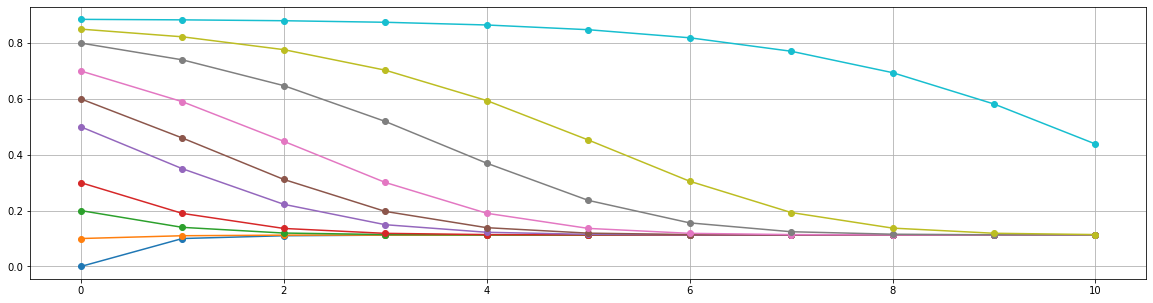

In [6]:
# multiples condiciones iniciales
T = 10 # cantida de iteraciones o pasos
xini = [0, 0.1, 0.2, 0.3, 0.5, 0.6,0.7,0.8,0.85,0.885]
# map plot recibe como primer argumento la funcion, segundo argumento la(s) condicion(es) incial(es)
# y el tercer argumento es la cantidad de iteraciones
map_plot(f2,xini, T)

## Puntos fijos

Puntos fijos son aquellos valores $x_*$ que se mapean a si mismos es decir, que cumplen $f(x_*)=x_*$

En el caso anterior tenemos que resolver 
$x_*^2+0.1=x_*$

$x^2+b*x+c = 0$

$x = \frac{-b \pm \sqrt{b^2-4c}}{2}$

esto tiene dos soluciones:
$x_* = \frac{1 \pm \sqrt{1-0.4}}{2}$

In [50]:
print((1-np.sqrt(0.001))/2)
print((1+np.sqrt(0.001))/2)

0.4841886116991581
0.5158113883008419


## Estabilidad de los puntos fijos

La estabilidad de los puntos fijos se estudia agregando una perturbacion $\delta$ al valor del punto fijo $x_*$ y estudiando como evoluciona esa perturbacion con el mapa. Se puede tambien escribir un mapa para la evolucion de $\delta$

En el caso de este mapa $f(x_*+\delta) = (x_*+\delta)^2+0.1 = x_*^2+2x_*\delta + \delta^2 +0.1 = x_*+2x_*\delta + \delta^2$
donde usamos que $x_*^2+0.1 = x_*$ porque es un punto fijo.

Como la perturbacion es pequeña el termino dominante es $2x_*\delta$. Por lo tanto la evolucion de $\delta$ va ir a cero (punto fijo estable) si $2x_* < 1$ y va a crecer sin limite (punto fijo inestable) si $2x_* > 1$

De forma general para un mapa

$x_{n+1} = f(x_n)$

con punto fijo en $x_*$

la estabilidad del punto fijo esta dada por la condicion

$|\frac{df(x_*)}{dx}|  > 1 $  es inestable

$|\frac{df(x_*)}{dx}|  < 1 $  es estable

0.1127016653792583


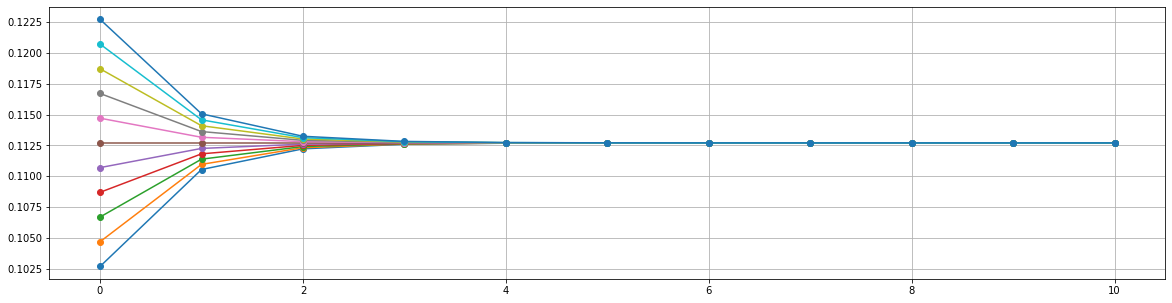

In [8]:
# estabilidad del primer punto fijo 0.1127016653792583
# 2x* < 1  estable
xs = (1-np.sqrt(0.6))/2
print(xs)
map_plot(f2,[xs+δ for δ in np.linspace(-0.01,0.01,11)], 10)

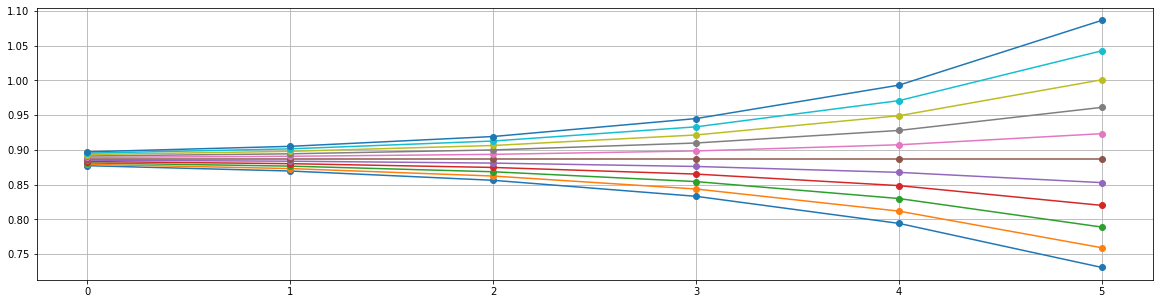

In [14]:
# estabilidad del segundo punto fijo 0.8872983346207417
# 2x* > 1  inestable
xs = (1+np.sqrt(0.6))/2
map_plot(f2,[xs+δ for δ in np.linspace(-0.01,0.01,11)], 5)

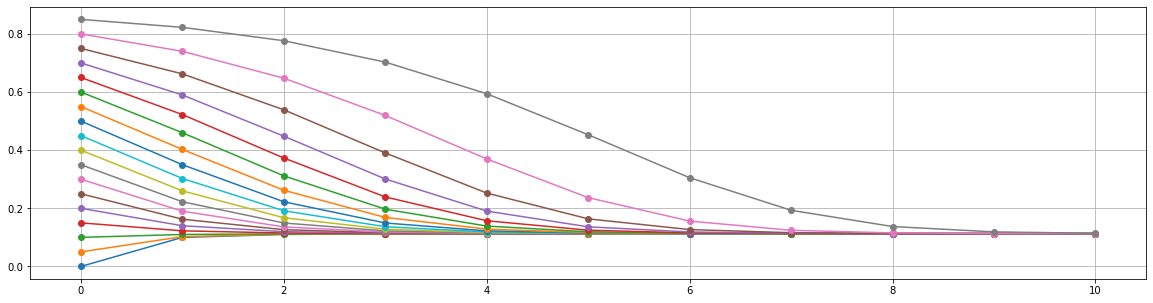

In [15]:
map_plot(f2,[0.05*n for n in range(18)], 10)

## Cobwebs

Los graficos Cobweb ayudan a entender la evolucion global del mapa. 
Representan en un grafico $x_{n+1}$ vs. $x_n$ (o bien $f(x)$ vs x) y la recta auxiliar $x=x$ que sirve para mapear el valor obtenido en $x_{n+1}$ como proximo valor para el mapa (reinjectar la salida en la entrada). 

La funcion cobweb hace el grafico cobweb de un mapa y una trayectoria y cobweb_animated la hace de forma animada
Si definimos una funcion g(x) la podemos pasar como argumento. Por ejemplo $cobweb(g,0.1,20)$ hace el grafico cobweb del mapa $x_{n+1}=g(x_{n})$ para la condicion inicial $x_0=0.1$ haciendo 20 iteraciones

map_plot hace de forma mas prolija la evolucion en el tiempo de un conjunto de condiciones iniciales. Por ejemplo $map\_plot(g,[0.1, 0.3, 0.8], 20)$ hace el grafico de la evolucion del mapa mapa $x_{n+1}=g(x_{n})$ para las tres condiciones iniciales $x_0=0.1,x_0=0.3,x_0=0.8$ haciendo 20 iteraciones

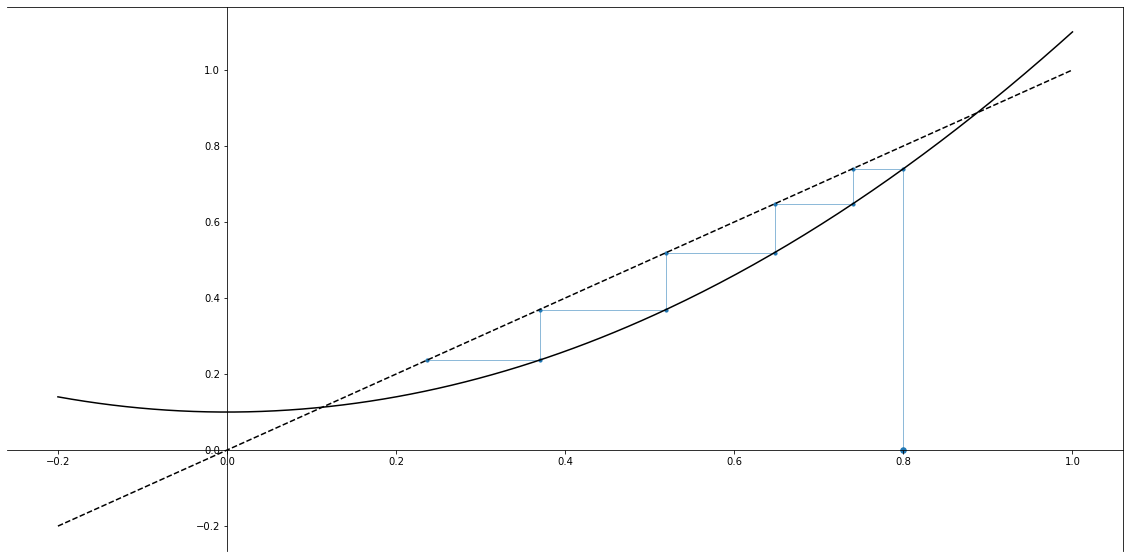

In [40]:
# cobweb del mapa dado por la funcion f2, para una unica condicion incial en 0.7 y por 20 iteraciones
cobweb(f2,0.8,5)

Mapa coseno

$x_{n+1} = cos (\pi x_n) $

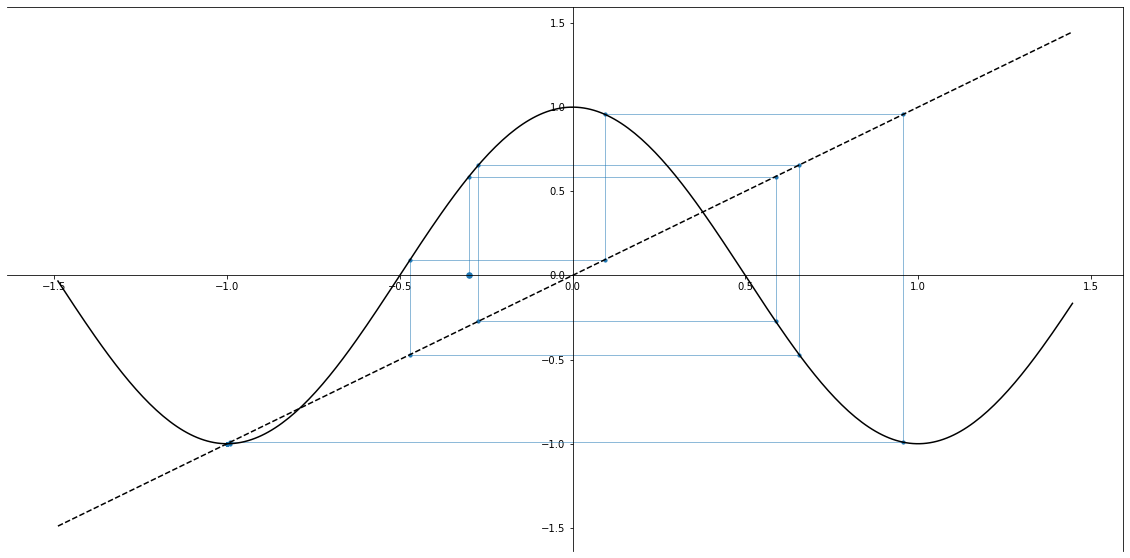

In [45]:
# mapa coseno

def fcos(x):
    return np.cos(np.pi*x)

cobweb(fcos,[-0.3],50)

In [15]:
# mapa seno ???
def fsin(x):
    return np.sin(np.pi*x)


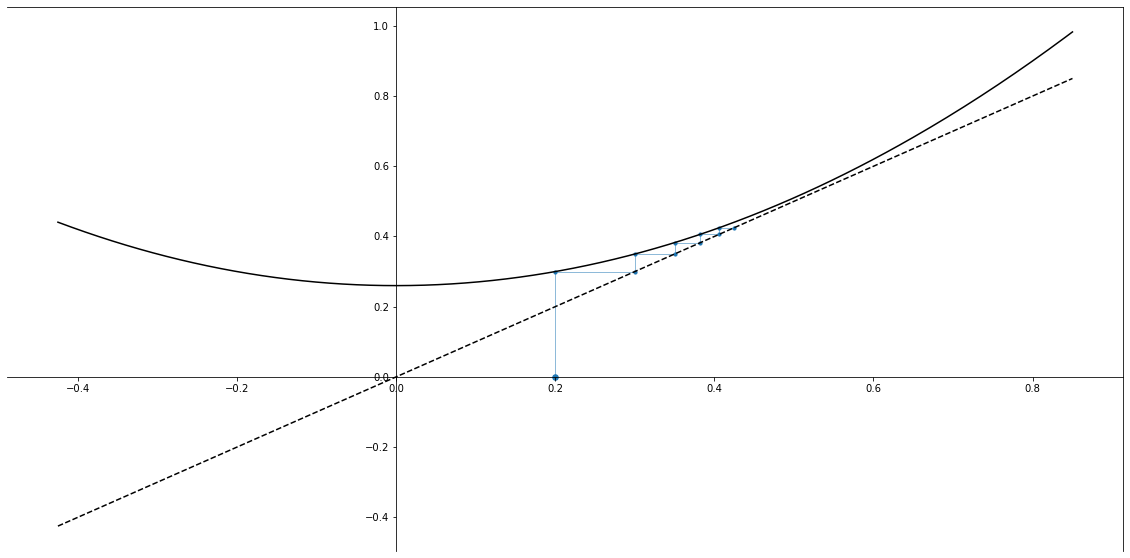

In [64]:
# que pasa si modificamos el termino constante del mapa cuadratico
def f2b(x):
    return x**2+0.26

cobweb(f2b,0.2,5,fscale=2)
# los dos puntos fijos se acercan mucho!

## Bifurcaciones en mapas

Que sucedera cuando seguimos aumentando el valor constante del mapa anterior. Por ejemplo para $f(x) = x^2 +0.3$ la recta diagonal no se corta con la parabola, por lo tanto no hay puntos fijos.

Este es un cambio cualitativo en la dinamica. Cuando (des)aparecen puntos fijos (o cambia la estabilidad de los mismos) en funcion de un parametro (en este caso podria ser el valor constante que sumamos a la cuadratica) decimos que hay una *bifurcacion*

Para estudiar las bifurcaciones vamos a definir las funciones dependiendo de uno o mas parametros y estudiamos como varia el mapa a medida que variamos lo parametros

In [65]:
# funcion cuadratica definida con el valor constante como un parametro
def f2c(x,*pars):
    return x**2+pars[0]

In [66]:
# por ejemplo la funcion aplicada al valor de variable $x=0.4$ para un valor del parametro 0.2 se calcula como:

f2c(0.4,0.2)

0.36000000000000004

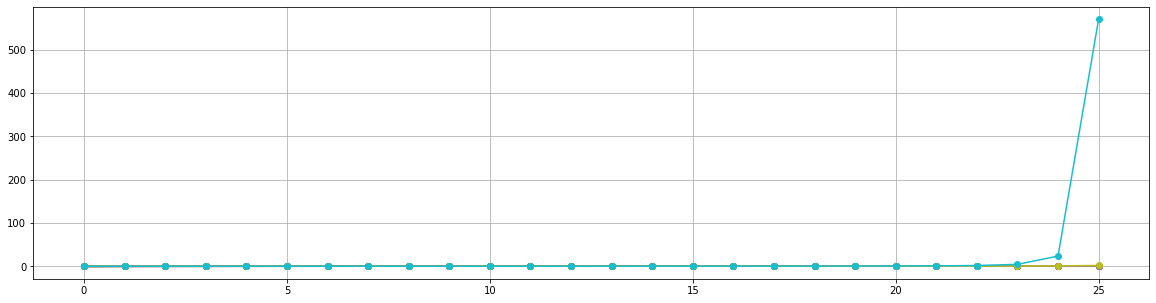

In [75]:
# map_plot me permite pasar una funcion con parametros y agregar el parametro al final

map_plot(f2c,[0.05*n for n in range(10)], 25,0.26)

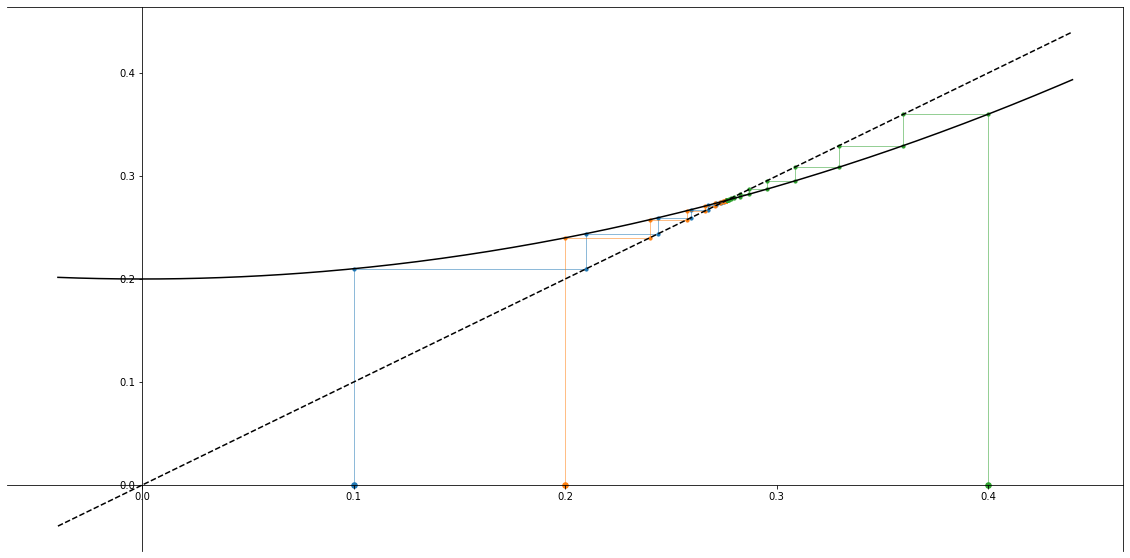

In [78]:
# sin puntos fijos
cobweb(f2c,[0.1,0.2,0.4],35,0.2,fscale=1.1)

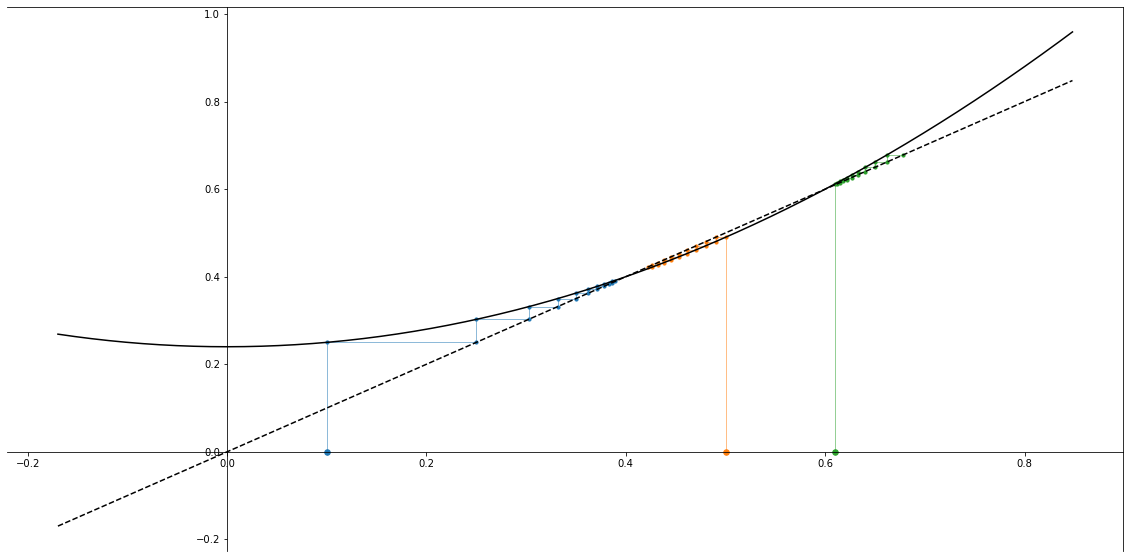

In [22]:
# dos puntos fijos
cobweb(f2c,[0.1,0.5,0.61],10,0.24)

## Diagramas de estado final (o de orbitas)

Para estudiar las bifurcaciones graficamos la convergencia de las trayectorias luego de una cantidad suficiente de iteraciones, hasta que converge a un punto fijo o a algun otro conjunto atractor (estado final).

La funcion orbitdiag recibe la funcion parametrizada como argumento, un conjunto de condiciones iniciales xini, una cantidad de iteraciones Tini que deja pasar antes de graficar el conjunto atractor (trayectoria entre Tini y Tfin), y la lista de los parametros plist

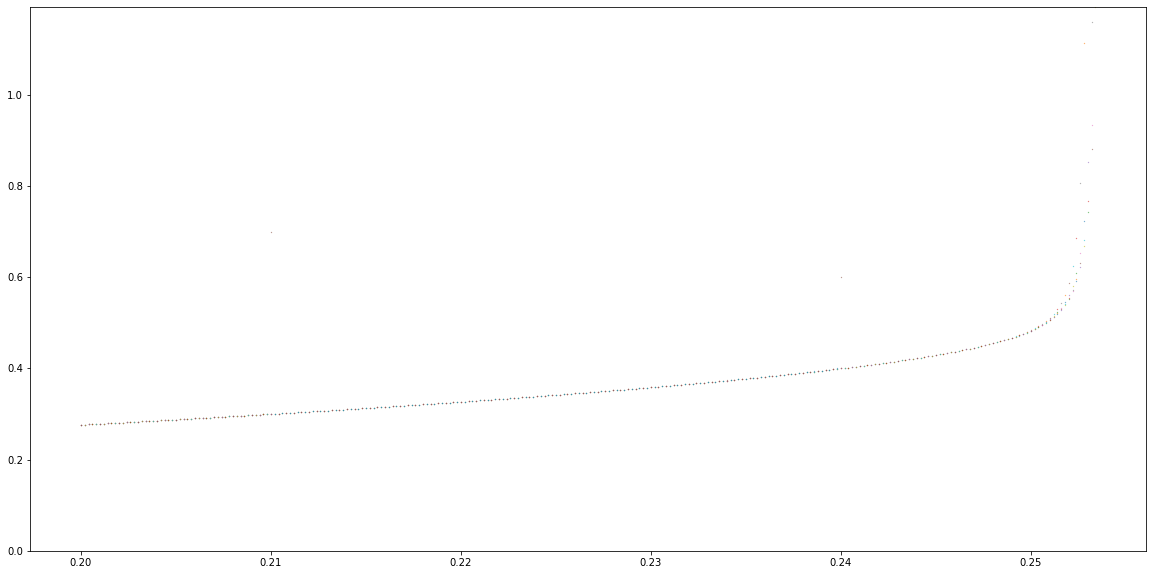

In [23]:
# Diagrama de orbitas para la funcion cuadratica mas constante
xini = [0.1, 0.2, 0.3, 0.4, 0.6,0.7,0.8]
Tini = 50
Tfin = 10
plist = np.arange(0.2,0.255,0.0002)
orbitdiag(f2c, xini, Tini, Tfin, plist, AMAX = 1)

In [24]:
# veamos otra funcion con un conjuto atractor mas interesante. La funcion cubica

def f3(x,p):
    return x*(p-x**2)
    

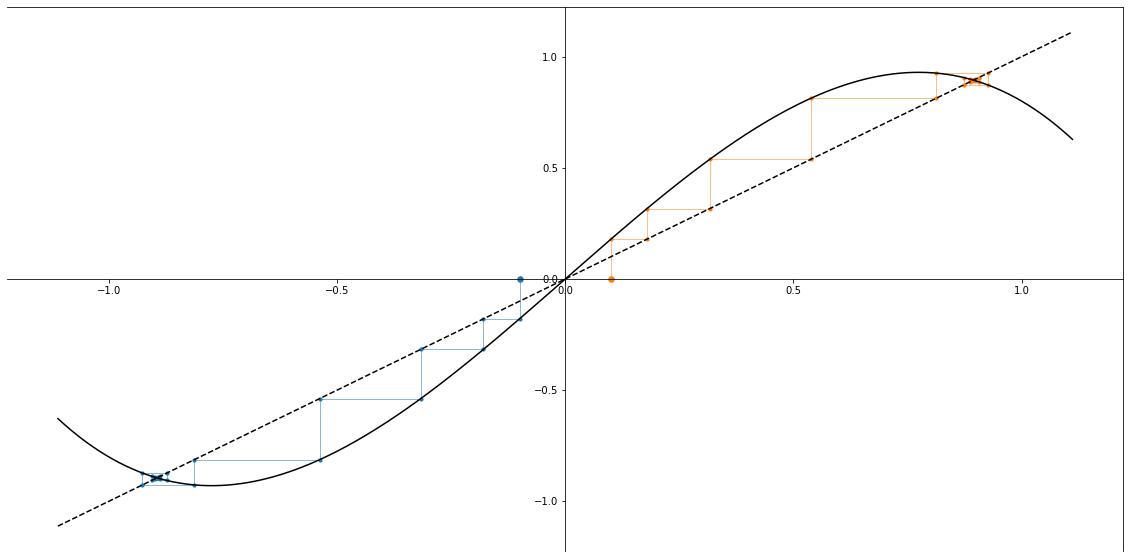

In [25]:
cobweb(f3,[-0.1,0.1],15,1.8,fscale=1.1)

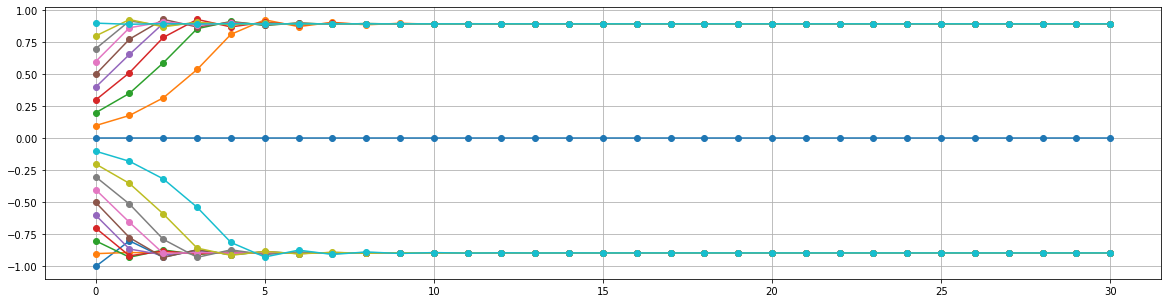

In [26]:
xini = [-1+0.1*n for n in range(20)]
map_plot(f3,xini, 30,1.8)

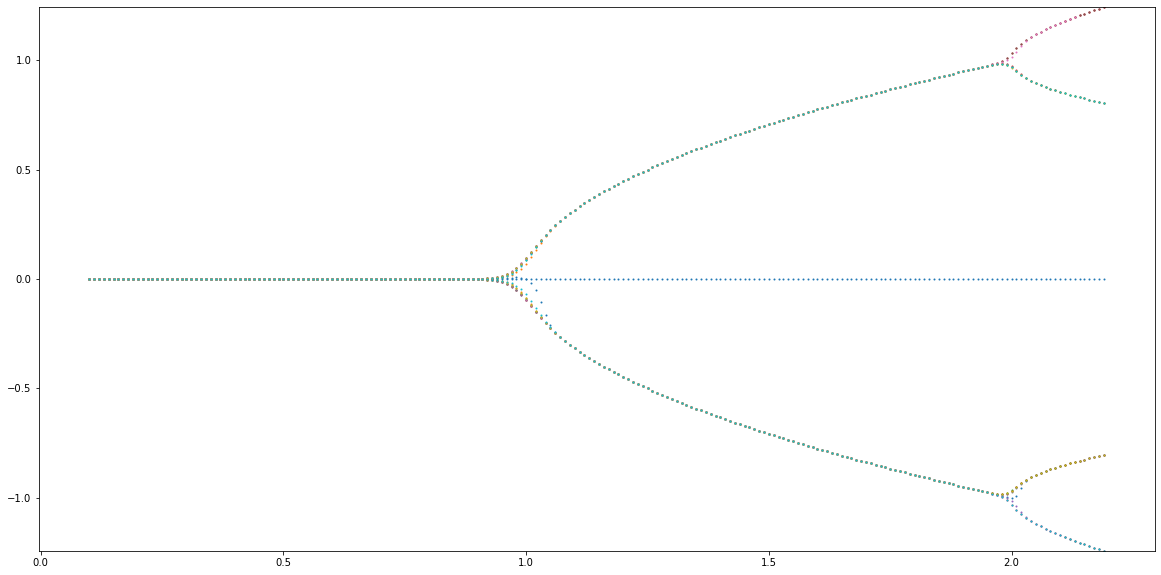

In [27]:
Tini = 50
Tfin = 2
plist = np.arange(0.1,2.2,0.01)
orbitdiag(f3, xini, Tini, Tfin, plist, msize=2,AMAX=3)